In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
x, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=57)

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=57)

In [4]:
model1 = RandomForestClassifier()
model1.fit(x_train, y_train)
rf_ytrain_pred = model1.predict_proba(x_train)
rf_ytest_pred = model1.predict_proba(x_test)

print(roc_auc_score(y_train, rf_ytrain_pred[:,1]))
print(roc_auc_score(y_test, rf_ytest_pred[:,1]))

1.0
0.935429386447803


In [5]:
model2 = AdaBoostClassifier()
model2.fit(x_train, y_train)
ada_ytrain_pred = model2.predict_proba(x_train)
ada_ytest_pred = model2.predict_proba(x_test)

print(roc_auc_score(y_train, ada_ytrain_pred[:,1]))
print(roc_auc_score(y_test, ada_ytest_pred[:,1]))

0.9651121000556281
0.9313507156440797


In [6]:
model3 = LogisticRegression()
model3.fit(x_train, y_train)
lr_ytrain_pred = model3.predict_proba(x_train)
lr_ytest_pred = model3.predict_proba(x_test)

print(roc_auc_score(y_train, lr_ytrain_pred[:,1]))
print(roc_auc_score(y_test, lr_ytest_pred[:,1]))

0.870970867111275
0.905565008507657


In [7]:
model4 = KNeighborsClassifier()
model4.fit(x_train, y_train)
kn_ytrain_pred = model4.predict_proba(x_train)
kn_ytest_pred = model4.predict_proba(x_test)

print(roc_auc_score(y_train, kn_ytrain_pred[:,1]))
print(roc_auc_score(y_test, kn_ytest_pred[:,1]))

0.9273982599021195
0.8273571214092683


In [9]:
pred = []
for model in [model1, model2, model3, model4]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9295866279651687


In [10]:
final_prediction

0      0.884608
1      0.735486
2      0.246280
3      0.892422
4      0.225889
         ...   
395    0.746250
396    0.753063
397    0.775506
398    0.722309
399    0.388763
Length: 400, dtype: float64

In [11]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.9510497 , 0.9510497 , 0.85661058, 0.85647316, 0.82365422,
       0.8229958 , 0.7780465 , 0.77550572, 0.74652735, 0.74624951,
       0.74057477, 0.73702976, 0.70282399, 0.70222999, 0.68532855,
       0.68391635, 0.67119607, 0.66584025, 0.66185876, 0.6577287 ,
       0.65109586, 0.64982616, 0.6424384 , 0.62665067, 0.59370909,
       0.59250975, 0.5919256 , 0.59168865, 0.59093059, 0.5906023 ,
       0.57292258, 0.5710292 , 0.5587661 , 0.55510188, 0.55252834,
       0.54967661, 0.5235132 , 0.52021658, 0.51069815, 0.49759967,
       0.49664051, 0.49595386, 0.49106623, 0.49034333, 0.48994788,
       0.48712553, 0.48704568, 0.47597688, 0.47109254, 0.47008772,
       0.46398477, 0.46144095, 0.45245884, 0.45179509, 0.45155946,
       0.45015213, 0.44857946, 0.4467895 , 0.44183615, 0.44085632,
       0.43885613, 0.43351496, 0.41071034, 0.41049077, 0.4100384 ,
       0.40586896, 0.40431491, 0.38170823, 0.37829617, 0.3713122 ,
       0.37083004, 0.36501392, 0.35766643, 0.32834549, 0.32592

In [12]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

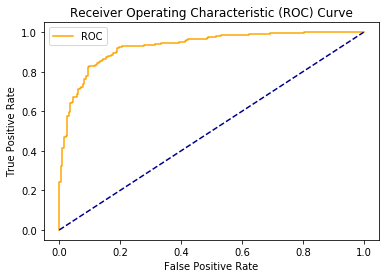

In [13]:
plot_roc_curve(fpr, tpr)

In [14]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
63,0.410491,0.8675
37,0.520217,0.8650
65,0.405869,0.8650
64,0.410038,0.8650
62,0.410710,0.8650
